### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

In [1]:
# write your code from here
# Step 1: Install scikit-learn
# If running in a notebook or script, uncomment the line below
# !pip install scikit-learn

# Step 2: Load a sample dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset as an example
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [2]:
# write your code from here
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Step 1: Load Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame.dropna()

# Optional: Scale features for better model performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('MEDV', axis=1))

# Step 2: Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_data)

# Predict anomalies
df['anomaly'] = iso_forest.predict(scaled_data)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 for anomaly

# View results
print(df[['MEDV', 'anomaly']].head())


   MEDV  anomaly
0  24.0        0
1  21.6        0
2  34.7        0
3  33.4        0
4  36.2        0


### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [3]:
# write your code from here
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load and prepare the Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame.dropna()
features = df.drop('MEDV', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_data)

# Task 3 - Step 1: Predict anomalies
predictions = iso_forest.predict(scaled_data)

# Convert predictions to binary format (1 = anomaly, 0 = normal)
df['anomaly'] = [1 if p == -1 else 0 for p in predictions]

# Task 3 - Step 2: Display anomaly counts
anomaly_counts = df['anomaly'].value_counts()
print("Anomaly Counts:")
print(anomaly_counts)


Anomaly Counts:
anomaly
0    480
1     26
Name: count, dtype: int64


### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

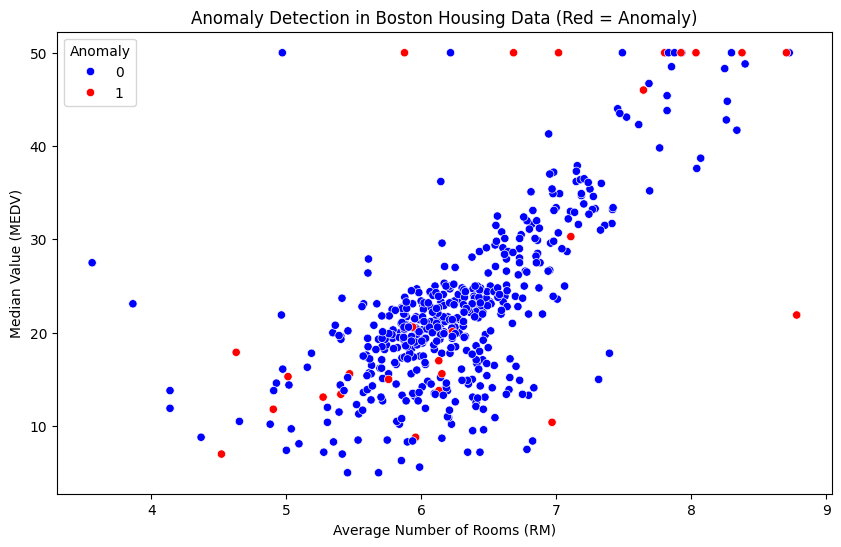

In [4]:
# write your code from here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load and prepare the Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame.dropna()
features = df.drop('MEDV', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_data)

# Predict anomalies
df['anomaly'] = iso_forest.predict(scaled_data)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Step 1: Scatter plot of anomalies (e.g., RM vs MEDV)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RM', y='MEDV', hue='anomaly', palette={0: 'blue', 1: 'red'})
plt.title("Anomaly Detection in Boston Housing Data (Red = Anomaly)")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.legend(title="Anomaly")
plt.show()


### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

   Contamination  Anomalies_Detected
0           0.01                   6
1           0.03                  16
2           0.05                  26
3           0.10                  51
4           0.20                 101


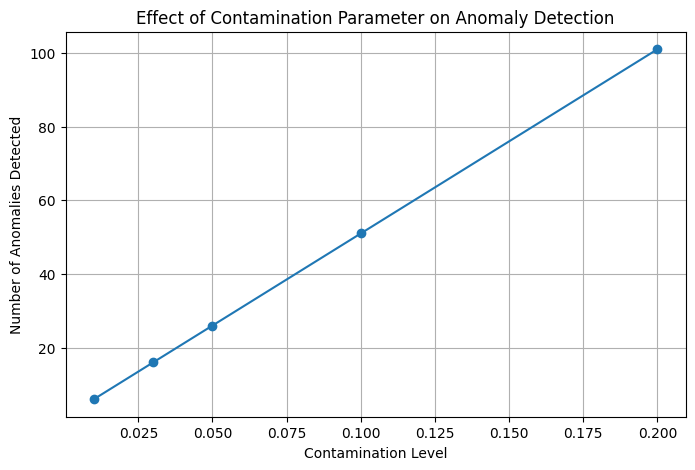

In [5]:
# write your code from here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load and prepare the Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame.dropna()
features = df.drop('MEDV', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Try different contamination levels
contamination_values = [0.01, 0.03, 0.05, 0.1, 0.2]
anomaly_counts = []

for c in contamination_values:
    model = IsolationForest(contamination=c, random_state=42)
    model.fit(scaled_data)
    preds = model.predict(scaled_data)
    anomalies = [1 if p == -1 else 0 for p in preds]
    anomaly_counts.append(sum(anomalies))

# Display results
results = pd.DataFrame({
    'Contamination': contamination_values,
    'Anomalies_Detected': anomaly_counts
})

print(results)

# Optional: Visualize the relationship
plt.figure(figsize=(8, 5))
plt.plot(results['Contamination'], results['Anomalies_Detected'], marker='o')
plt.title('Effect of Contamination Parameter on Anomaly Detection')
plt.xlabel('Contamination Level')
plt.ylabel('Number of Anomalies Detected')
plt.grid(True)
plt.show()
